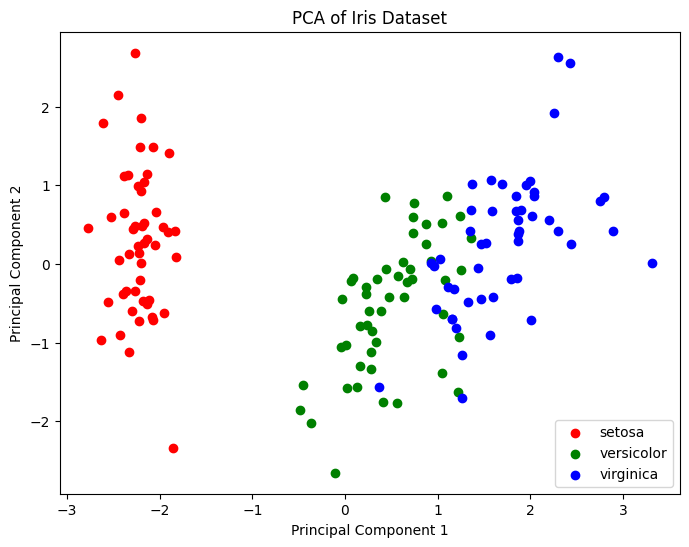

Explained variance ratio by each principal component: [0.72962445 0.22850762]


In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame to hold the PCA-transformed data
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = y

# Plot the PCA-transformed data
plt.figure(figsize=(8, 6))
for label, color in zip([0, 1, 2], ['r', 'g', 'b']):
    plt.scatter(df_pca.loc[df_pca['Target'] == label, 'Principal Component 1'], 
                df_pca.loc[df_pca['Target'] == label, 'Principal Component 2'], 
                label=data.target_names[label], 
                color=color)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

# Print explained variance
print("Explained variance ratio by each principal component:", pca.explained_variance_ratio_)


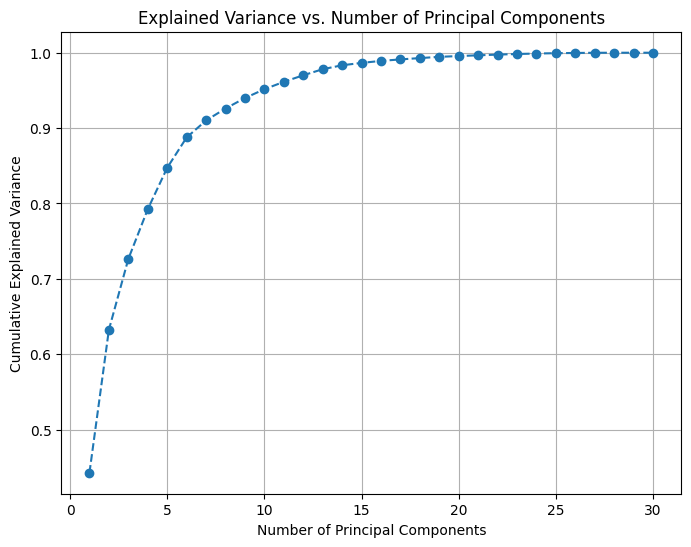

Number of components to retain ~95% variance: 10
Model Accuracy with PCA-transformed data: 0.98
Explained variance per component: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]


In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features (30-dimensional)
y = data.target  # Target (Malignant or Benign)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of principal components
pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the explained variance to visualize optimal number of components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()

# Set the number of components to retain ~95% variance (e.g., 10 components)
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Number of components to retain ~95% variance: {n_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train a logistic regression model on the PCA-transformed data
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with PCA-transformed data: {accuracy:.2f}")

# Inspect the explained variance of each component
explained_variance_per_component = pca.explained_variance_ratio_
print("Explained variance per component:", explained_variance_per_component)


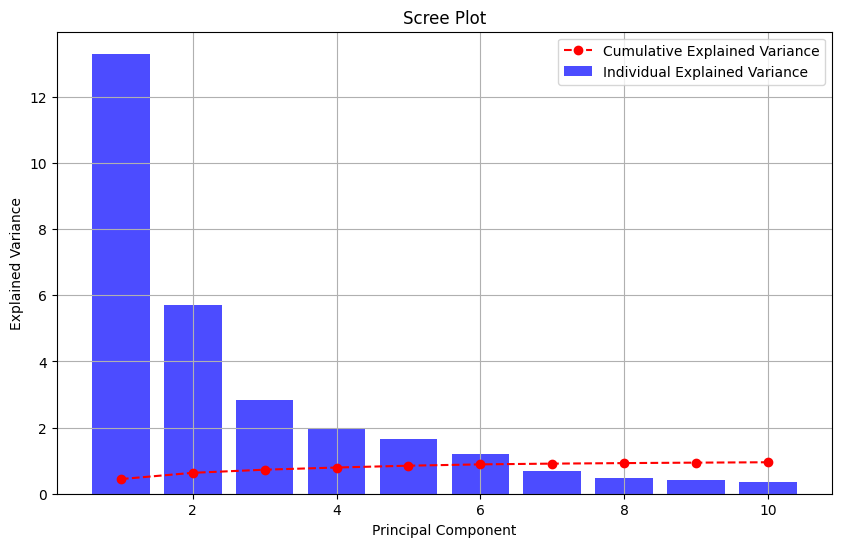

In [6]:
# Plotting the Scree Plot to visualize the explained variance by each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), pca.explained_variance_, alpha=0.7, color='b', label='Individual Explained Variance')
plt.plot(range(1, n_components + 1), explained_variance[:n_components], marker='o', color='r', linestyle='--', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()


In [7]:
# Number of top components to inspect
top_n_components = 5

# Display explained variance for top 5 components
print("Explained variance for top 5 components:")
for i in range(top_n_components):
    print(f"Principal Component {i + 1}: {pca.explained_variance_ratio_[i]:.4f}")

# Display the loadings (weights) of each feature for the top 5 components
# Each column represents a principal component, and each row represents a feature
loadings = pca.components_[:top_n_components]  # Loadings for the top 5 components

# Create a DataFrame for better readability
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(top_n_components)], index=data.feature_names)
print("\nPrincipal Component Loadings for top 5 components:")
print(loadings_df)


Explained variance for top 5 components:
Principal Component 1: 0.4427
Principal Component 2: 0.1897
Principal Component 3: 0.0939
Principal Component 4: 0.0660
Principal Component 5: 0.0550

Principal Component Loadings for top 5 components:
                              PC1       PC2       PC3       PC4       PC5
mean radius              0.218902 -0.233857 -0.008531  0.041409  0.037786
mean texture             0.103725 -0.059706  0.064550 -0.603050 -0.049469
mean perimeter           0.227537 -0.215181 -0.009314  0.041983  0.037375
mean area                0.220995 -0.231077  0.028700  0.053434  0.010331
mean smoothness          0.142590  0.186113 -0.104292  0.159383 -0.365089
mean compactness         0.239285  0.151892 -0.074092  0.031795  0.011704
mean concavity           0.258400  0.060165  0.002734  0.019123  0.086375
mean concave points      0.260854 -0.034768 -0.025564  0.065336 -0.043861
mean symmetry            0.138167  0.190349 -0.040240  0.067125 -0.305941
mean fractal dime

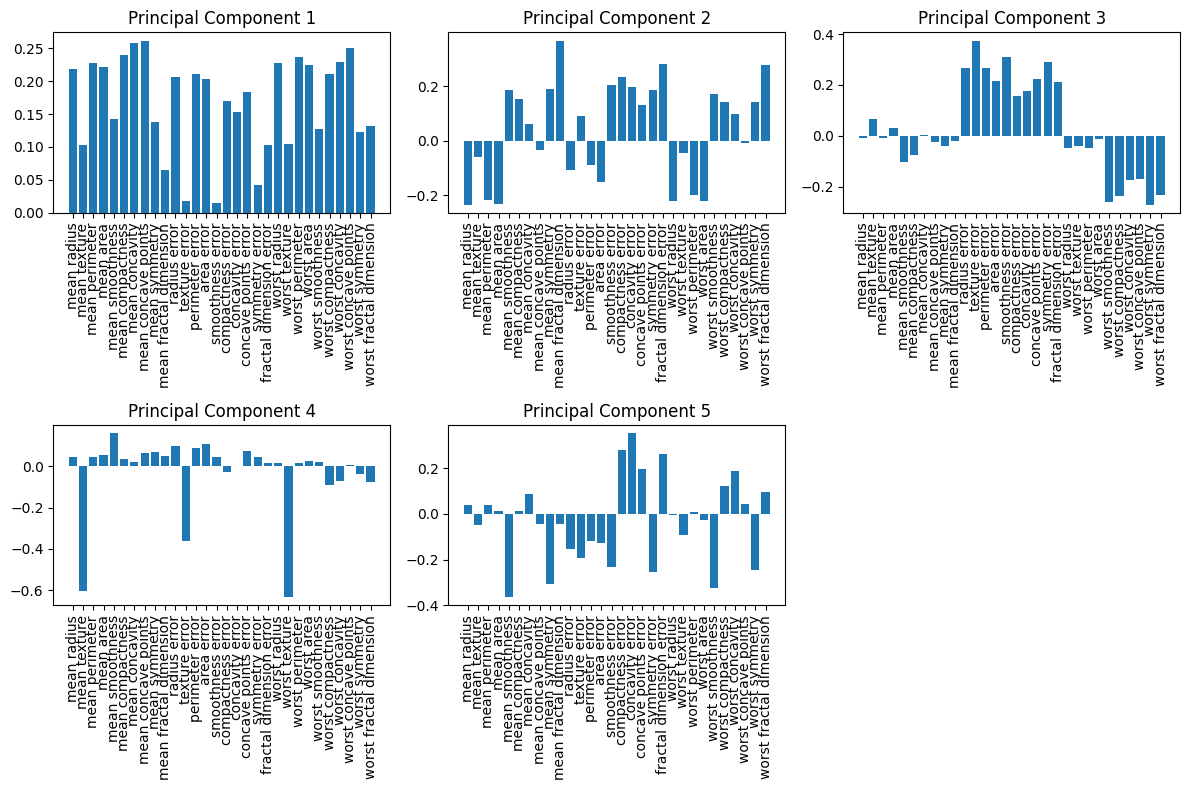

In [9]:
# see the loadings for the top 5 components, each of them in a reparate plt
plt.figure(figsize=(12, 8))
for i in range(top_n_components):
    plt.subplot(2, 3, i + 1)
    plt.bar(range(len(data.feature_names)), loadings[i], tick_label=data.feature_names)
    plt.xticks(rotation=90)
    plt.title(f'Principal Component {i + 1}')
plt.tight_layout()
plt.show()
